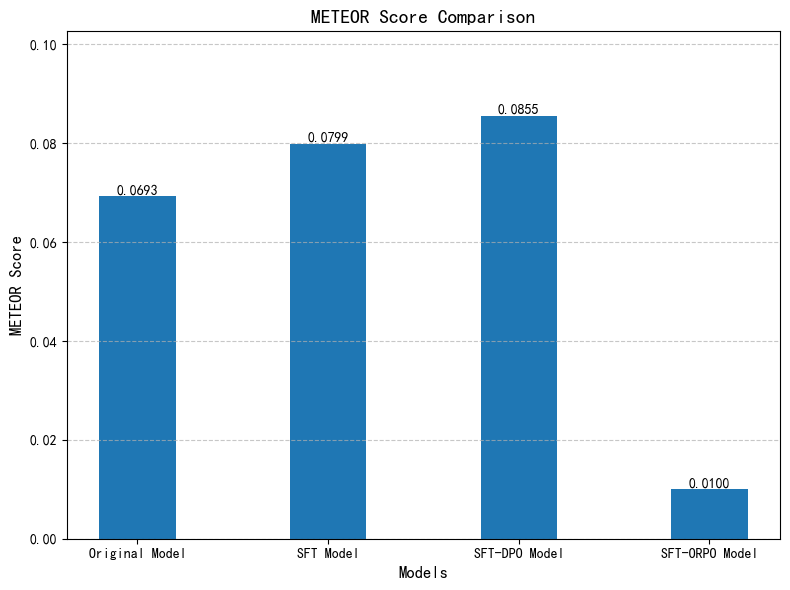

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('origin_average_meteor_score.csv')
df2 = pd.read_csv('SFT_average_meteor_score.csv')
df3 = pd.read_csv('DPO_average_meteor_score.csv')
df4 = pd.read_csv('ORPO_average_meteor_score.csv')
score1 = df1['average_meteor'].tolist()[0]
score2 = df2['average_meteor'].tolist()[0]
score3 = df3['average_meteor'].tolist()[0]
score4 = df4['average_meteor'].tolist()[0]
# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据
models = ['Original Model', 'SFT Model', 'SFT-DPO Model', 'SFT-ORPO Model']  # 模型名称
bleu_scores = [score1, score2, score3, score4]  # 替换成你的实际BLEU分数

# 创建图表
plt.figure(figsize=(8, 6))

# 绘制柱状图
bars = plt.bar(models, bleu_scores, width=0.4)

# 设置标题和标签
plt.title('METEOR Score Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('METEOR Score', fontsize=12)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# 设置y轴范围（可选，根据实际分数调整）
plt.ylim(0, max(bleu_scores) * 1.2)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

C:\Users\13686\AppData\Local\Temp\ipykernel_38672\513410704.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=['Original', 'SFT', 'SFT-DPO', 'SFT-ORPO'])


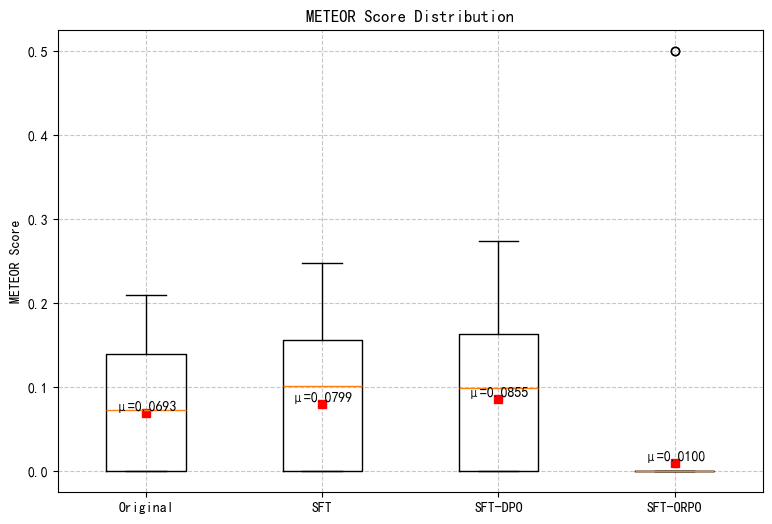

In [3]:
df1 = pd.read_csv('origin_detailed_meteor_scores.csv')
df2 = pd.read_csv('SFT_detailed_meteor_scores.csv')
df3 = pd.read_csv('DPO_detailed_meteor_scores.csv')
df4 = pd.read_csv('ORPO_detailed_meteor_scores.csv')

# 创建图表
plt.figure(figsize=(20, 6))

# 1. 箱线图对比
plt.subplot(1, 2, 1)
data = [df1['meteor'], df2['meteor'], df3['meteor'], df4['meteor']]
bp = plt.boxplot(data, labels=['Original', 'SFT', 'SFT-DPO', 'SFT-ORPO'])

# 添加均值点
means = [df1['meteor'].mean(), df2['meteor'].mean(), df3['meteor'].mean(), df4['meteor'].mean()]
plt.plot([1, 2, 3, 4], means, 'rs', label='Mean')

# 在图上标注均值
for i, mean in enumerate(means):
    plt.text(i+1, mean, f'μ={mean:.4f}', 
             horizontalalignment='center', 
             verticalalignment='bottom')

plt.title('METEOR Score Distribution')
plt.ylabel('METEOR Score')
plt.grid(True, linestyle='--', alpha=0.7)

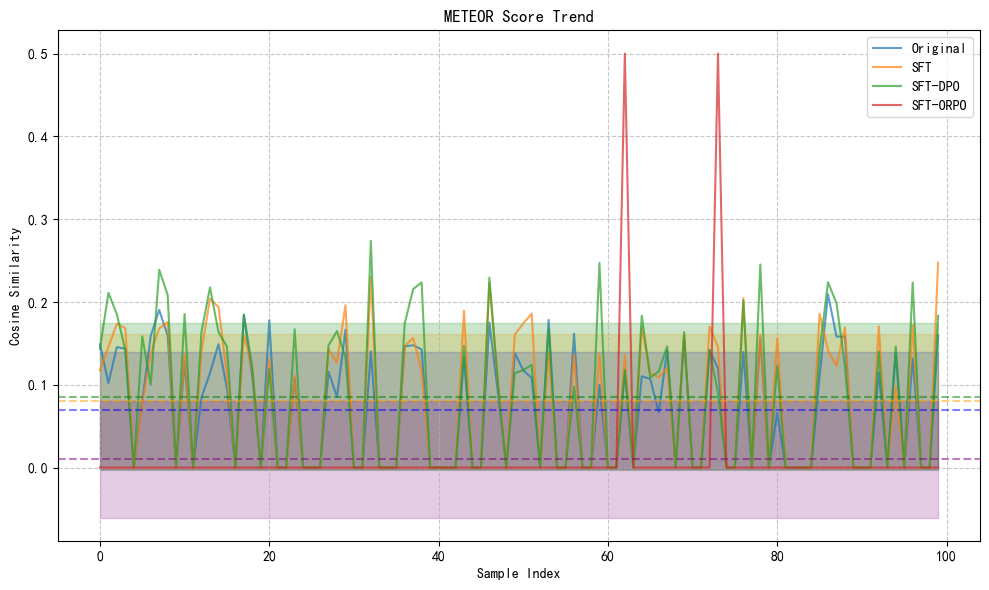

In [4]:
# 2. 折线图对比
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 6))
x = range(len(df1))
plt.plot(x, df1['meteor'], label='Original', alpha=0.7)
plt.plot(x, df2['meteor'], label='SFT', alpha=0.7)
plt.plot(x, df3['meteor'], label='SFT-DPO', alpha=0.7)
plt.plot(x, df4['meteor'], label='SFT-ORPO', alpha=0.7)
# 添加置信区间
def add_confidence_interval(data, color, alpha=0.2):
    mean = data.mean()
    std = data.std()
    plt.axhline(y=mean, color=color, linestyle='--', alpha=0.5)
    plt.fill_between(x, mean-std, mean+std, color=color, alpha=alpha)

add_confidence_interval(df1['meteor'], 'blue')
add_confidence_interval(df2['meteor'], 'orange')
add_confidence_interval(df3['meteor'], 'green')
add_confidence_interval(df4['meteor'], 'purple')
plt.title('METEOR Score Trend')
plt.xlabel('Sample Index')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()
plt.show()
